In [1]:
using SymPy
using Plots

In [2]:
x,x₁,y,y₁,r,r₁ = symbols("x,x₁,y,y₁,r,r₁", real = true)
E,v= symbols("E,v", real = true)
C₁₁ₘ,C₁₂ₘ,C₂₂ₘ,d₁₁ₘ,d₁₂ₘ,d₁₃ₘ,d₂₁ₘ,d₂₂ₘ,d₂₃ₘ,a₁₁ₘ,a₂₂ₘ = symbols("C₁₁ₘ,C₁₂ₘ,C₂₂ₘ,d₁₁ₘ,d₁₂ₘ,d₁₃ₘ,d₂₁ₘ,d₂₂ₘ,d₂₃ₘ,a₁₁ₘ,a₂₂ₘ", real = true)
C₁₁ᵢ,C₁₂ᵢ,C₂₂ᵢ,d₁₁ᵢ,d₁₂ᵢ,d₁₃ᵢ,d₂₁ᵢ,d₂₂ᵢ,d₂₃ᵢ,a₁₁ᵢ,a₂₂ᵢ = symbols("C₁₁ᵢ,C₁₂ᵢ,C₂₂ᵢ,d₁₁ᵢ,d₁₂ᵢ,d₁₃ᵢ,d₂₁ᵢ,d₂₂ᵢ,d₂₃ᵢ,a₁₁ᵢ,a₂₂ᵢ", real = true)

(C₁₁ᵢ, C₁₂ᵢ, C₂₂ᵢ, d₁₁ᵢ, d₁₂ᵢ, d₁₃ᵢ, d₂₁ᵢ, d₂₂ᵢ, d₂₃ᵢ, a₁₁ᵢ, a₂₂ᵢ)

In [3]:
A = 0.25
Eq = (3*(x^2))/4 - A
p = abs(solve(Eq,x)[1])

0.577350269189626

In [4]:
Eₘ = 2450
vₘ = 0.34
Eᵢ = 170000
vᵢ = 0.25
hₛ = 0.01

0.01

In [5]:
λ = (E*v)/((1 + v) * (1 - 2*v))
λₘ = simplify(λ(E=>Eₘ,v=>vₘ))
λᵢ = simplify(λ(E=>Eᵢ,v=>vᵢ))

68000.0000000000

In [6]:
G = E/((1 + v))
Gₘ = simplify(G(E=>Eₘ,v=>vₘ))
Gᵢ = simplify(G(E=>Eᵢ,v=>vᵢ))

136000.000000000

In [7]:
C₁₁ₘ = λₘ + Gₘ

3770.98880597015

In [8]:
C₁₁ᵢ = λᵢ + Gᵢ

204000.000000000

In [9]:
lₘₓ = 1
lₐ₁ₙ = p
lₙₓ = p/2

0.288675134594813

In [10]:
heaviside(x) = 0.5 * (sign(x) + 1)

interval(x, a, b) = heaviside(x-a) - heaviside(x-b)

interval (generic function with 1 method)

In [11]:
E1x(x,ax,bx) = sqrt(C₁₁ᵢ - C₁₁ₘ) * interval(x,ax,bx) 
E1y(y,ay,by) = sqrt(C₁₁ᵢ - C₁₁ₘ) * interval(y,ay,by) 

E1y (generic function with 1 method)

In [12]:
wₕ(x,x₁) = (1/(sqrt(2*pi)*hₛ))*exp(-(x-x₁)^2/(2*hₛ^2))

wₕ (generic function with 1 method)

In [13]:
IFx1 = E1x(x₁,-lₙₓ,lₙₓ)*wₕ(x,x₁)
IFx2 = E1x(x₁,-lₐ₁ₙ,lₐ₁ₙ)*wₕ(x,x₁)

                                                                              
                                                                              
39.8942280401433⋅(-223.734782272465⋅sign(x₁ - 0.577350269189626) + 223.7347822

                                                     2
                                     -5000.0⋅(x - x₁) 
72465⋅sign(x₁ + 0.577350269189626))⋅ℯ                 

In [14]:
IFy1 = E1y(y₁,-lₙₓ,lₙₓ)*wₕ(y,y₁)
IFy2 = E1y(y₁,-lₐ₁ₙ,-lₙₓ)*wₕ(y,y₁)
IFy3 = E1y(y₁,lₙₓ,lₐ₁ₙ)*wₕ(y,y₁)

                                                                              
                                                                              
39.8942280401433⋅(-223.734782272465⋅sign(y₁ - 0.577350269189626) + 223.7347822

                                                     2
                                     -5000.0⋅(y - y₁) 
72465⋅sign(y₁ - 0.288675134594813))⋅ℯ                 

In [15]:
smoothE1 = integrate(IFx2,(x₁,-lₘₓ,lₘₓ))*integrate(IFy1,(y₁,-lₘₓ,lₘₓ))
smoothE2 = integrate(IFx1,(x₁,-lₘₓ,lₘₓ))*integrate(IFy2,(y₁,-lₘₓ,lₘₓ))
smoothE3 = integrate(IFx1,(x₁,-lₘₓ,lₘₓ))*integrate(IFy3,(y₁,-lₘₓ,lₘₓ))

(-126.22883363545⋅√π⋅erf(70.7106781186548⋅x - 20.4124145231931) + 126.22883363
545⋅√π⋅erf(70.7106781186548⋅x + 20.4124145231931))⋅(-126.22883363545⋅√π⋅erf(70
.7106781186548⋅y - 40.8248290463863) + 126.22883363545⋅√π⋅erf(70.7106781186548
⋅y - 20.4124145231931))

In [16]:
C₁₁₁₁ = smoothE1 + smoothE2 + smoothE3 + C₁₁ₘ

(-126.22883363545⋅√π⋅erf(70.7106781186548⋅x - 40.8248290463863) + 126.22883363
545⋅√π⋅erf(70.7106781186548⋅x + 40.8248290463863))⋅(-126.22883363545⋅√π⋅erf(70
.7106781186548⋅y - 20.4124145231931) + 126.22883363545⋅√π⋅erf(70.7106781186548
⋅y + 20.4124145231931)) + (-126.22883363545⋅√π⋅erf(70.7106781186548⋅x - 20.412
4145231931) + 126.22883363545⋅√π⋅erf(70.7106781186548⋅x + 20.4124145231931))⋅(
-126.22883363545⋅√π⋅erf(70.7106781186548⋅y - 40.8248290463863) + 126.228833635
45⋅√π⋅erf(70.7106781186548⋅y - 20.4124145231931)) + (-126.22883363545⋅√π⋅erf(7
0.7106781186548⋅x - 20.4124145231931) + 126.22883363545⋅√π⋅erf(70.710678118654
8⋅x + 20.4124145231931))⋅(-126.22883363545⋅√π⋅erf(70.7106781186548⋅y + 20.4124
145231931) + 126.22883363545⋅√π⋅erf(70.7106781186548⋅y + 40.8248290463863)) + 
3770.98880597015

In [17]:
Ediscont1 = E1x(x₁,-lₐ₁ₙ,lₐ₁ₙ)*E1y(y₁,-lₙₓ,lₙₓ)
Ediscont2 = E1x(x₁,-lₙₓ,lₙₓ)*E1y(y₁,-lₐ₁ₙ,-lₙₓ)
Ediscont3 = E1x(x₁,-lₙₓ,lₙₓ)*E1y(y₁,lₙₓ,lₐ₁ₙ)
Ediscont = Ediscont1 + Ediscont2 + Ediscont3 + C₁₁ₘ

(-223.734782272465⋅sign(x₁ - 0.577350269189626) + 223.734782272465⋅sign(x₁ + 0
.577350269189626))⋅(-223.734782272465⋅sign(y₁ - 0.288675134594813) + 223.73478
2272465⋅sign(y₁ + 0.288675134594813)) + (-223.734782272465⋅sign(x₁ - 0.2886751
34594813) + 223.734782272465⋅sign(x₁ + 0.288675134594813))⋅(-223.734782272465⋅
sign(y₁ - 0.577350269189626) + 223.734782272465⋅sign(y₁ - 0.288675134594813)) 
+ (-223.734782272465⋅sign(x₁ - 0.288675134594813) + 223.734782272465⋅sign(x₁ +
 0.288675134594813))⋅(-223.734782272465⋅sign(y₁ + 0.288675134594813) + 223.734
782272465⋅sign(y₁ + 0.577350269189626)) + 3770.98880597015

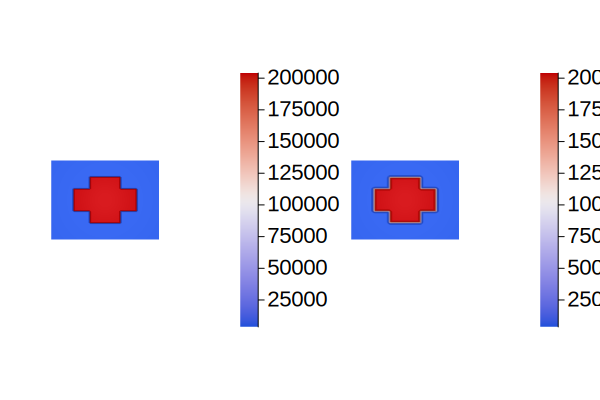

In [18]:
xs = ys = range(-lₘₓ,lₘₓ, length=100)
plot1 = surface(xs, ys, Ediscont, c=:diverging_bwr_40_95_c42_n256, axis = nothing, showaxis =false,aspect_ratio=:equal, camera=(0,90))
plot2 = surface(xs, ys, C₁₁₁₁, c=:diverging_bwr_40_95_c42_n256, axis = nothing, showaxis =false,aspect_ratio=:equal,camera=(0,90))
plot(plot1,plot2)

In [19]:
C₁₂ₘ = λₘ
C₁₂ᵢ = λᵢ

68000.0000000000

In [20]:
E2x(x,ax,bx) = sqrt(C₁₂ᵢ - C₁₂ₘ) * interval(x,ax,bx) 
E2y(y,ay,by) = sqrt(C₁₂ᵢ - C₁₂ₘ) * interval(y,ay,by) 

E2y (generic function with 1 method)

In [21]:
IF2x1 = E2x(x₁,-lₙₓ,lₙₓ)*wₕ(x,x₁)
IF2x2 = E2x(x₁,-lₐ₁ₙ,lₐ₁ₙ)*wₕ(x,x₁)

                                                                              
                                                                              
39.8942280401433⋅(-128.508141184698⋅sign(x₁ - 0.577350269189626) + 128.5081411

                                                     2
                                     -5000.0⋅(x - x₁) 
84698⋅sign(x₁ + 0.577350269189626))⋅ℯ                 

In [22]:
IF2y1 = E2y(y₁,-lₙₓ,lₙₓ)*wₕ(y,y₁)
IF2y2 = E2y(y₁,-lₐ₁ₙ,-lₙₓ)*wₕ(y,y₁)
IF2y3 = E2y(y₁,lₙₓ,lₐ₁ₙ)*wₕ(y,y₁)

                                                                              
                                                                              
39.8942280401433⋅(-128.508141184698⋅sign(y₁ - 0.577350269189626) + 128.5081411

                                                     2
                                     -5000.0⋅(y - y₁) 
84698⋅sign(y₁ - 0.288675134594813))⋅ℯ                 

In [23]:
smooth2E1 = integrate(IF2x2,(x₁,-lₘₓ,lₘₓ))*integrate(IF2y1,(y₁,-lₘₓ,lₘₓ))
smooth2E2 = integrate(IF2x1,(x₁,-lₘₓ,lₘₓ))*integrate(IF2y2,(y₁,-lₘₓ,lₘₓ))
smooth2E3 = integrate(IF2x1,(x₁,-lₘₓ,lₘₓ))*integrate(IF2y3,(y₁,-lₘₓ,lₘₓ))

(-72.502954657491⋅√π⋅erf(70.7106781186548⋅x - 20.4124145231931) + 72.502954657
491⋅√π⋅erf(70.7106781186548⋅x + 20.4124145231931))⋅(-72.502954657491⋅√π⋅erf(70
.7106781186548⋅y - 40.8248290463863) + 72.502954657491⋅√π⋅erf(70.7106781186548
⋅y - 20.4124145231931))

In [24]:
C₁₁₂₂ = smooth2E1 + smooth2E2 + smooth2E3 + C₁₂ₘ

(-72.502954657491⋅√π⋅erf(70.7106781186548⋅x - 40.8248290463863) + 72.502954657
491⋅√π⋅erf(70.7106781186548⋅x + 40.8248290463863))⋅(-72.502954657491⋅√π⋅erf(70
.7106781186548⋅y - 20.4124145231931) + 72.502954657491⋅√π⋅erf(70.7106781186548
⋅y + 20.4124145231931)) + (-72.502954657491⋅√π⋅erf(70.7106781186548⋅x - 20.412
4145231931) + 72.502954657491⋅√π⋅erf(70.7106781186548⋅x + 20.4124145231931))⋅(
-72.502954657491⋅√π⋅erf(70.7106781186548⋅y - 40.8248290463863) + 72.5029546574
91⋅√π⋅erf(70.7106781186548⋅y - 20.4124145231931)) + (-72.502954657491⋅√π⋅erf(7
0.7106781186548⋅x - 20.4124145231931) + 72.502954657491⋅√π⋅erf(70.710678118654
8⋅x + 20.4124145231931))⋅(-72.502954657491⋅√π⋅erf(70.7106781186548⋅y + 20.4124
145231931) + 72.502954657491⋅√π⋅erf(70.7106781186548⋅y + 40.8248290463863)) + 
1942.63059701493

E2discont1 = -E2x(x₁,-7.5,7.5)*E2y(y₁,-5,5)
E2discont2 = -E2x(x₁,-5,5)*E2y(y₁,-7.5,-5)
E2discont3 = -E2x(x₁,-5,5)*E2y(y₁,5,7.5)
E2discont = E2discont1 + E2discont2 + E2discont3 + C₁₂ₘ

xs = ys = range(-10,10, length=100)
plot1 = surface(xs, ys, E2discont, c=:diverging_bwr_40_95_c42_n256, axis = nothing, showaxis =false,aspect_ratio=:equal, camera=(0,90))
plot2 = surface(xs, ys, C₁₁₂₂, c=:diverging_bwr_40_95_c42_n256, axis = nothing, showaxis =false,aspect_ratio=:equal,camera=(0,90))
plot(plot1,plot2)

In [25]:
C₃₃ₘ = Gₘ
C₃₃ᵢ = Gᵢ

136000.000000000

In [26]:
E3x(x,ax,bx) = sqrt(C₃₃ᵢ - C₃₃ₘ) * interval(x,ax,bx) 
E3y(y,ay,by) = sqrt(C₃₃ᵢ - C₃₃ₘ) * interval(y,ay,by) 

E3y (generic function with 1 method)

In [27]:
IF3x1 = E3x(x₁,-lₙₓ,lₙₓ)*wₕ(x,x₁)
IF3x2 = E3x(x₁,-lₐ₁ₙ,lₐ₁ₙ)*wₕ(x,x₁)

                                                                              
                                                                              
39.8942280401433⋅(-183.147237073785⋅sign(x₁ - 0.577350269189626) + 183.1472370

                                                     2
                                     -5000.0⋅(x - x₁) 
73785⋅sign(x₁ + 0.577350269189626))⋅ℯ                 

In [28]:
IF3y1 = E3y(y₁,-lₙₓ,lₙₓ)*wₕ(y,y₁)
IF3y2 = E3y(y₁,-lₐ₁ₙ,-lₙₓ)*wₕ(y,y₁)
IF3y3 = E3y(y₁,lₙₓ,lₐ₁ₙ)*wₕ(y,y₁)

                                                                              
                                                                              
39.8942280401433⋅(-183.147237073785⋅sign(y₁ - 0.577350269189626) + 183.1472370

                                                     2
                                     -5000.0⋅(y - y₁) 
73785⋅sign(y₁ - 0.288675134594813))⋅ℯ                 

In [29]:
smooth3E1 = integrate(IF3x2,(x₁,-lₘₓ,lₘₓ))*integrate(IF3y1,(y₁,-lₘₓ,lₘₓ))
smooth3E2 = integrate(IF3x1,(x₁,-lₘₓ,lₘₓ))*integrate(IF3y2,(y₁,-lₘₓ,lₘₓ))
smooth3E3 = integrate(IF3x1,(x₁,-lₘₓ,lₘₓ))*integrate(IF3y3,(y₁,-lₘₓ,lₘₓ))

(-103.329763412581⋅√π⋅erf(70.7106781186548⋅x - 20.4124145231931) + 103.3297634
12581⋅√π⋅erf(70.7106781186548⋅x + 20.4124145231931))⋅(-103.329763412581⋅√π⋅erf
(70.7106781186548⋅y - 40.8248290463863) + 103.329763412581⋅√π⋅erf(70.710678118
6548⋅y - 20.4124145231931))

In [30]:
C₃₃₃₃ = smooth3E1 + smooth3E2 + smooth3E3 + C₃₃ₘ

(-103.329763412581⋅√π⋅erf(70.7106781186548⋅x - 40.8248290463863) + 103.3297634
12581⋅√π⋅erf(70.7106781186548⋅x + 40.8248290463863))⋅(-103.329763412581⋅√π⋅erf
(70.7106781186548⋅y - 20.4124145231931) + 103.329763412581⋅√π⋅erf(70.710678118
6548⋅y + 20.4124145231931)) + (-103.329763412581⋅√π⋅erf(70.7106781186548⋅x - 2
0.4124145231931) + 103.329763412581⋅√π⋅erf(70.7106781186548⋅x + 20.41241452319
31))⋅(-103.329763412581⋅√π⋅erf(70.7106781186548⋅y - 40.8248290463863) + 103.32
9763412581⋅√π⋅erf(70.7106781186548⋅y - 20.4124145231931)) + (-103.329763412581
⋅√π⋅erf(70.7106781186548⋅x - 20.4124145231931) + 103.329763412581⋅√π⋅erf(70.71
06781186548⋅x + 20.4124145231931))⋅(-103.329763412581⋅√π⋅erf(70.7106781186548⋅
y + 20.4124145231931) + 103.329763412581⋅√π⋅erf(70.7106781186548⋅y + 40.824829
0463863)) + 1828.35820895522

xs = ys = range(-10,10, length=100)
plot1 = surface(xs, ys, Ediscont3, c=:diverging_bwr_40_95_c42_n256, axis = nothing, showaxis =false,aspect_ratio=:equal, camera=(0,90))
plot2 = surface(xs, ys, smooth3E, c=:diverging_bwr_40_95_c42_n256, axis = nothing, showaxis =false,aspect_ratio=:equal,camera=(0,90))
plot(plot1,plot2)

In [31]:
d₁₁ₘ = 0
d₁₁ᵢ = 20

20

In [32]:
D1x(x,ax,bx) = sqrt(d₁₁ᵢ - d₁₁ₘ) * interval(x,ax,bx) 
D1y(y,ay,by) = sqrt(d₁₁ᵢ - d₁₁ₘ) * interval(y,ay,by) 

D1y (generic function with 1 method)

In [33]:
ID1x1 = D1x(x₁,-lₙₓ,lₙₓ)*wₕ(x,x₁)
ID1x2 = D1x(x₁,-lₐ₁ₙ,lₐ₁ₙ)*wₕ(x,x₁)

                                                                              
                                                                              
39.8942280401433⋅(-2.23606797749979⋅sign(x₁ - 0.577350269189626) + 2.236067977

                                                     2
                                     -5000.0⋅(x - x₁) 
49979⋅sign(x₁ + 0.577350269189626))⋅ℯ                 

In [34]:
ID1y1 = D1y(y₁,-lₙₓ,lₙₓ)*wₕ(y,y₁)
ID1y2 = D1y(y₁,-lₐ₁ₙ,-lₙₓ)*wₕ(y,y₁)
ID1y3 = D1y(y₁,lₙₓ,lₐ₁ₙ)*wₕ(y,y₁)

                                                                              
                                                                              
39.8942280401433⋅(-2.23606797749979⋅sign(y₁ - 0.577350269189626) + 2.236067977

                                                     2
                                     -5000.0⋅(y - y₁) 
49979⋅sign(y₁ - 0.288675134594813))⋅ℯ                 

In [35]:
smooth1D1 = integrate(ID1x2,(x₁,-lₘₓ,lₘₓ))*integrate(ID1y1,(y₁,-lₘₓ,lₘₓ))
smooth1D2 = integrate(ID1x1,(x₁,-lₘₓ,lₘₓ))*integrate(ID1y2,(y₁,-lₘₓ,lₘₓ))
smooth1D3 = integrate(ID1x1,(x₁,-lₘₓ,lₘₓ))*integrate(ID1y3,(y₁,-lₘₓ,lₘₓ))

(-1.26156626101008⋅√π⋅erf(70.7106781186548⋅x - 20.4124145231931) + 1.261566261
01008⋅√π⋅erf(70.7106781186548⋅x + 20.4124145231931))⋅(-1.26156626101008⋅√π⋅erf
(70.7106781186548⋅y - 40.8248290463863) + 1.26156626101008⋅√π⋅erf(70.710678118
6548⋅y - 20.4124145231931))

In [36]:
D₁₁ = smooth1D1 + smooth1D2 + smooth1D3 + d₁₁ₘ

(-1.26156626101008⋅√π⋅erf(70.7106781186548⋅x - 40.8248290463863) + 1.261566261
01008⋅√π⋅erf(70.7106781186548⋅x + 40.8248290463863))⋅(-1.26156626101008⋅√π⋅erf
(70.7106781186548⋅y - 20.4124145231931) + 1.26156626101008⋅√π⋅erf(70.710678118
6548⋅y + 20.4124145231931)) + (-1.26156626101008⋅√π⋅erf(70.7106781186548⋅x - 2
0.4124145231931) + 1.26156626101008⋅√π⋅erf(70.7106781186548⋅x + 20.41241452319
31))⋅(-1.26156626101008⋅√π⋅erf(70.7106781186548⋅y - 40.8248290463863) + 1.2615
6626101008⋅√π⋅erf(70.7106781186548⋅y - 20.4124145231931)) + (-1.26156626101008
⋅√π⋅erf(70.7106781186548⋅x - 20.4124145231931) + 1.26156626101008⋅√π⋅erf(70.71
06781186548⋅x + 20.4124145231931))⋅(-1.26156626101008⋅√π⋅erf(70.7106781186548⋅
y + 20.4124145231931) + 1.26156626101008⋅√π⋅erf(70.7106781186548⋅y + 40.824829
0463863))

In [37]:
d₁₂ₘ = 20
d₁₂ᵢ = -0.9

-0.9

In [38]:
D22x(x,ax,bx) = sqrt(d₁₂ₘ - d₁₂ᵢ) * interval(x,ax,bx) 
D22y(y,ay,by) = sqrt(d₁₂ₘ - d₁₂ᵢ) * interval(y,ay,by) 

D22y (generic function with 1 method)

In [39]:
ID22x1 = D22x(x₁,-lₙₓ,lₙₓ)*wₕ(x,x₁)
ID22x2 = D22x(x₁,-lₐ₁ₙ,lₐ₁ₙ)*wₕ(x,x₁)

                                                                              
                                                                              
39.8942280401433⋅(-2.28582589013249⋅sign(x₁ - 0.577350269189626) + 2.285825890

                                                     2
                                     -5000.0⋅(x - x₁) 
13249⋅sign(x₁ + 0.577350269189626))⋅ℯ                 

In [40]:
ID22y1 = D22y(y₁,-lₙₓ,lₙₓ)*wₕ(y,y₁)
ID22y2 = D22y(y₁,-lₐ₁ₙ,-lₙₓ)*wₕ(y,y₁)
ID22y3 = D22y(y₁,lₙₓ,lₐ₁ₙ)*wₕ(y,y₁)

                                                                              
                                                                              
39.8942280401433⋅(-2.28582589013249⋅sign(y₁ - 0.577350269189626) + 2.285825890

                                                     2
                                     -5000.0⋅(y - y₁) 
13249⋅sign(y₁ - 0.288675134594813))⋅ℯ                 

In [41]:
smooth22D1 = -integrate(ID22x2,(x₁,-lₘₓ,lₘₓ))*integrate(ID22y1,(y₁,-lₘₓ,lₘₓ))
smooth22D2 = -integrate(ID22x1,(x₁,-lₘₓ,lₘₓ))*integrate(ID22y2,(y₁,-lₘₓ,lₘₓ))
smooth22D3 = -integrate(ID22x1,(x₁,-lₘₓ,lₘₓ))*integrate(ID22y3,(y₁,-lₘₓ,lₘₓ))

(1.28963915701653⋅√π⋅erf(70.7106781186548⋅x - 20.4124145231931) - 1.2896391570
1653⋅√π⋅erf(70.7106781186548⋅x + 20.4124145231931))⋅(-1.28963915701653⋅√π⋅erf(
70.7106781186548⋅y - 40.8248290463863) + 1.28963915701653⋅√π⋅erf(70.7106781186
548⋅y - 20.4124145231931))

In [42]:
D₂₁ = smooth22D1 + smooth22D2 + smooth22D3 + d₁₂ₘ

(1.28963915701653⋅√π⋅erf(70.7106781186548⋅x - 40.8248290463863) - 1.2896391570
1653⋅√π⋅erf(70.7106781186548⋅x + 40.8248290463863))⋅(-1.28963915701653⋅√π⋅erf(
70.7106781186548⋅y - 20.4124145231931) + 1.28963915701653⋅√π⋅erf(70.7106781186
548⋅y + 20.4124145231931)) + (1.28963915701653⋅√π⋅erf(70.7106781186548⋅x - 20.
4124145231931) - 1.28963915701653⋅√π⋅erf(70.7106781186548⋅x + 20.4124145231931
))⋅(-1.28963915701653⋅√π⋅erf(70.7106781186548⋅y - 40.8248290463863) + 1.289639
15701653⋅√π⋅erf(70.7106781186548⋅y - 20.4124145231931)) + (1.28963915701653⋅√π
⋅erf(70.7106781186548⋅x - 20.4124145231931) - 1.28963915701653⋅√π⋅erf(70.71067
81186548⋅x + 20.4124145231931))⋅(-1.28963915701653⋅√π⋅erf(70.7106781186548⋅y +
 20.4124145231931) + 1.28963915701653⋅√π⋅erf(70.7106781186548⋅y + 40.824829046
3863)) + 20

In [43]:
d₂₂ₘ = 3
d₂₂ᵢ = -0.9

-0.9

In [44]:
D2x(x,ax,bx) = sqrt(d₂₂ₘ - d₂₂ᵢ) * interval(x,ax,bx) 
D2y(y,ay,by) = sqrt(d₂₂ₘ - d₂₂ᵢ) * interval(y,ay,by) 

D2y (generic function with 1 method)

In [45]:
ID2x1 = D2x(x₁,-lₙₓ,lₙₓ)*wₕ(x,x₁)
ID2x2 = D2x(x₁,-lₐ₁ₙ,lₐ₁ₙ)*wₕ(x,x₁)

                                                                              
                                                                              
39.8942280401433⋅(-0.987420882906575⋅sign(x₁ - 0.577350269189626) + 0.98742088

                                                       2
                                       -5000.0⋅(x - x₁) 
2906575⋅sign(x₁ + 0.577350269189626))⋅ℯ                 

In [46]:
ID2y1 = D2y(y₁,-lₙₓ,lₙₓ)*wₕ(y,y₁)
ID2y2 = D2y(y₁,-lₐ₁ₙ,-lₙₓ)*wₕ(y,y₁)
ID2y3 = D2y(y₁,lₙₓ,lₐ₁ₙ)*wₕ(y,y₁)

                                                                              
                                                                              
39.8942280401433⋅(-0.987420882906575⋅sign(y₁ - 0.577350269189626) + 0.98742088

                                                       2
                                       -5000.0⋅(y - y₁) 
2906575⋅sign(y₁ - 0.288675134594813))⋅ℯ                 

In [47]:
smooth2D1 = -integrate(ID2x2,(x₁,-lₘₓ,lₘₓ))*integrate(ID2y1,(y₁,-lₘₓ,lₘₓ))
smooth2D2 = -integrate(ID2x1,(x₁,-lₘₓ,lₘₓ))*integrate(ID2y2,(y₁,-lₘₓ,lₘₓ))
smooth2D3 = -integrate(ID2x1,(x₁,-lₘₓ,lₘₓ))*integrate(ID2y3,(y₁,-lₘₓ,lₘₓ))

(0.557092576713418⋅√π⋅erf(70.7106781186548⋅x - 20.4124145231931) - 0.557092576
713418⋅√π⋅erf(70.7106781186548⋅x + 20.4124145231931))⋅(-0.557092576713418⋅√π⋅e
rf(70.7106781186548⋅y - 40.8248290463863) + 0.557092576713418⋅√π⋅erf(70.710678
1186548⋅y - 20.4124145231931))

In [48]:
D₂₂ = smooth2D1 + smooth2D2 + smooth2D3 + d₂₂ₘ

(0.557092576713418⋅√π⋅erf(70.7106781186548⋅x - 40.8248290463863) - 0.557092576
713418⋅√π⋅erf(70.7106781186548⋅x + 40.8248290463863))⋅(-0.557092576713418⋅√π⋅e
rf(70.7106781186548⋅y - 20.4124145231931) + 0.557092576713418⋅√π⋅erf(70.710678
1186548⋅y + 20.4124145231931)) + (0.557092576713418⋅√π⋅erf(70.7106781186548⋅x 
- 20.4124145231931) - 0.557092576713418⋅√π⋅erf(70.7106781186548⋅x + 20.4124145
231931))⋅(-0.557092576713418⋅√π⋅erf(70.7106781186548⋅y - 40.8248290463863) + 0
.557092576713418⋅√π⋅erf(70.7106781186548⋅y - 20.4124145231931)) + (0.557092576
713418⋅√π⋅erf(70.7106781186548⋅x - 20.4124145231931) - 0.557092576713418⋅√π⋅er
f(70.7106781186548⋅x + 20.4124145231931))⋅(-0.557092576713418⋅√π⋅erf(70.710678
1186548⋅y + 20.4124145231931) + 0.557092576713418⋅√π⋅erf(70.7106781186548⋅y + 
40.8248290463863)) + 3

In [49]:
d₂₃ₘ = -46
d₂₃ᵢ = 6

6

In [50]:
D3x(x,ax,bx) = sqrt(d₂₃ᵢ - d₂₃ₘ) * interval(x,ax,bx) 
D3y(y,ay,by) = sqrt(d₂₃ᵢ - d₂₃ₘ) * interval(y,ay,by) 

D3y (generic function with 1 method)

In [51]:
ID3x1 = D3x(x₁,-lₙₓ,lₙₓ)*wₕ(x,x₁)
ID3x2 = D3x(x₁,-lₐ₁ₙ,lₐ₁ₙ)*wₕ(x,x₁)

                                                                              
                                                                              
39.8942280401433⋅(-3.60555127546399⋅sign(x₁ - 0.577350269189626) + 3.605551275

                                                     2
                                     -5000.0⋅(x - x₁) 
46399⋅sign(x₁ + 0.577350269189626))⋅ℯ                 

In [52]:
ID3y1 = D3y(y₁,-lₙₓ,lₙₓ)*wₕ(y,y₁)
ID3y2 = D3y(y₁,-lₐ₁ₙ,-lₙₓ)*wₕ(y,y₁)
ID3y3 = D3y(y₁,lₙₓ,lₐ₁ₙ)*wₕ(y,y₁)

                                                                              
                                                                              
39.8942280401433⋅(-3.60555127546399⋅sign(y₁ - 0.577350269189626) + 3.605551275

                                                     2
                                     -5000.0⋅(y - y₁) 
46399⋅sign(y₁ - 0.288675134594813))⋅ℯ                 

In [53]:
smooth3D1 = integrate(ID3x2,(x₁,-lₘₓ,lₘₓ))*integrate(ID3y1,(y₁,-lₘₓ,lₘₓ))
smooth3D2 = integrate(ID3x1,(x₁,-lₘₓ,lₘₓ))*integrate(ID3y2,(y₁,-lₘₓ,lₘₓ))
smooth3D3 = integrate(ID3x1,(x₁,-lₘₓ,lₘₓ))*integrate(ID3y3,(y₁,-lₘₓ,lₘₓ))

(-2.03421447256411⋅√π⋅erf(70.7106781186548⋅x - 20.4124145231931) + 2.034214472
56411⋅√π⋅erf(70.7106781186548⋅x + 20.4124145231931))⋅(-2.03421447256411⋅√π⋅erf
(70.7106781186548⋅y - 40.8248290463863) + 2.03421447256411⋅√π⋅erf(70.710678118
6548⋅y - 20.4124145231931))

In [54]:
D₂₃ = smooth3D1 + smooth3D2 + smooth3D3 + d₂₃ₘ

(-2.03421447256411⋅√π⋅erf(70.7106781186548⋅x - 40.8248290463863) + 2.034214472
56411⋅√π⋅erf(70.7106781186548⋅x + 40.8248290463863))⋅(-2.03421447256411⋅√π⋅erf
(70.7106781186548⋅y - 20.4124145231931) + 2.03421447256411⋅√π⋅erf(70.710678118
6548⋅y + 20.4124145231931)) + (-2.03421447256411⋅√π⋅erf(70.7106781186548⋅x - 2
0.4124145231931) + 2.03421447256411⋅√π⋅erf(70.7106781186548⋅x + 20.41241452319
31))⋅(-2.03421447256411⋅√π⋅erf(70.7106781186548⋅y - 40.8248290463863) + 2.0342
1447256411⋅√π⋅erf(70.7106781186548⋅y - 20.4124145231931)) + (-2.03421447256411
⋅√π⋅erf(70.7106781186548⋅x - 20.4124145231931) + 2.03421447256411⋅√π⋅erf(70.71
06781186548⋅x + 20.4124145231931))⋅(-2.03421447256411⋅√π⋅erf(70.7106781186548⋅
y + 20.4124145231931) + 2.03421447256411⋅√π⋅erf(70.7106781186548⋅y + 40.824829
0463863)) - 46

In [55]:
a₁₁ₘ = 79.65
a₁₁ᵢ = 384.975

384.975

In [56]:
A1x(x,ax,bx) = sqrt(a₁₁ᵢ - a₁₁ₘ) * interval(x,ax,bx) 
A1y(y,ay,by) = sqrt(a₁₁ᵢ - a₁₁ₘ) * interval(y,ay,by) 

A1y (generic function with 1 method)

In [57]:
IA1x1 = A1x(x₁,-lₙₓ,lₙₓ)*wₕ(x,x₁)
IA1x2 = A1x(x₁,-lₐ₁ₙ,lₐ₁ₙ)*wₕ(x,x₁)

                                                                              
                                                                              
39.8942280401433⋅(-8.73677572105408⋅sign(x₁ - 0.577350269189626) + 8.736775721

                                                     2
                                     -5000.0⋅(x - x₁) 
05408⋅sign(x₁ + 0.577350269189626))⋅ℯ                 

In [58]:
IA1y1 = A1y(y₁,-lₙₓ,lₙₓ)*wₕ(y,y₁)
IA1y2 = A1y(y₁,-lₐ₁ₙ,-lₙₓ)*wₕ(y,y₁)
IA1y3 = A1y(y₁,lₙₓ,lₐ₁ₙ)*wₕ(y,y₁)

                                                                              
                                                                              
39.8942280401433⋅(-8.73677572105408⋅sign(y₁ - 0.577350269189626) + 8.736775721

                                                     2
                                     -5000.0⋅(y - y₁) 
05408⋅sign(y₁ - 0.288675134594813))⋅ℯ                 

In [59]:
smooth1A1 = integrate(IA1x2,(x₁,-lₘₓ,lₘₓ))*integrate(IA1y1,(y₁,-lₘₓ,lₘₓ))
smooth1A2 = integrate(IA1x1,(x₁,-lₘₓ,lₘₓ))*integrate(IA1y2,(y₁,-lₘₓ,lₘₓ))
smooth1A3 = integrate(IA1x1,(x₁,-lₘₓ,lₘₓ))*integrate(IA1y3,(y₁,-lₘₓ,lₘₓ))

(-4.92919785561165⋅√π⋅erf(70.7106781186548⋅x - 20.4124145231931) + 4.929197855
61165⋅√π⋅erf(70.7106781186548⋅x + 20.4124145231931))⋅(-4.92919785561165⋅√π⋅erf
(70.7106781186548⋅y - 40.8248290463863) + 4.92919785561165⋅√π⋅erf(70.710678118
6548⋅y - 20.4124145231931))

In [60]:
A₁₁ = smooth1A1 + smooth1A2 + smooth1A3 + a₁₁ₘ

(-4.92919785561165⋅√π⋅erf(70.7106781186548⋅x - 40.8248290463863) + 4.929197855
61165⋅√π⋅erf(70.7106781186548⋅x + 40.8248290463863))⋅(-4.92919785561165⋅√π⋅erf
(70.7106781186548⋅y - 20.4124145231931) + 4.92919785561165⋅√π⋅erf(70.710678118
6548⋅y + 20.4124145231931)) + (-4.92919785561165⋅√π⋅erf(70.7106781186548⋅x - 2
0.4124145231931) + 4.92919785561165⋅√π⋅erf(70.7106781186548⋅x + 20.41241452319
31))⋅(-4.92919785561165⋅√π⋅erf(70.7106781186548⋅y - 40.8248290463863) + 4.9291
9785561165⋅√π⋅erf(70.7106781186548⋅y - 20.4124145231931)) + (-4.92919785561165
⋅√π⋅erf(70.7106781186548⋅x - 20.4124145231931) + 4.92919785561165⋅√π⋅erf(70.71
06781186548⋅x + 20.4124145231931))⋅(-4.92919785561165⋅√π⋅erf(70.7106781186548⋅
y + 20.4124145231931) + 4.92919785561165⋅√π⋅erf(70.7106781186548⋅y + 40.824829
0463863)) + 79.65

In [61]:
a₂₂ₘ = 79.65
a₂₂ᵢ = 265.5

265.5

In [62]:
A2x(x,ax,bx) = sqrt(a₂₂ᵢ - a₂₂ₘ)  * interval(x,ax,bx) 
A2y(y,ay,by) = sqrt(a₂₂ᵢ - a₂₂ₘ)  * interval(y,ay,by) 

A2y (generic function with 1 method)

In [63]:
IA2x1 = A2x(x₁,-lₙₓ,lₙₓ)*wₕ(x,x₁)
IA2x2 = A2x(x₁,-lₐ₁ₙ,lₐ₁ₙ)*wₕ(x,x₁)

                                                                              
                                                                              
39.8942280401433⋅(-6.81634066050106⋅sign(x₁ - 0.577350269189626) + 6.816340660

                                                     2
                                     -5000.0⋅(x - x₁) 
50106⋅sign(x₁ + 0.577350269189626))⋅ℯ                 

In [64]:
IA2y1 = A2y(y₁,-lₙₓ,lₙₓ)*wₕ(y,y₁)
IA2y2 = A2y(y₁,-lₐ₁ₙ,-lₙₓ)*wₕ(y,y₁)
IA2y3 = A2y(y₁,lₙₓ,lₐ₁ₙ)*wₕ(y,y₁)

                                                                              
                                                                              
39.8942280401433⋅(-6.81634066050106⋅sign(y₁ - 0.577350269189626) + 6.816340660

                                                     2
                                     -5000.0⋅(y - y₁) 
50106⋅sign(y₁ - 0.288675134594813))⋅ℯ                 

In [65]:
smooth2A1 = integrate(IA2x2,(x₁,-lₘₓ,lₘₓ))*integrate(IA2y1,(y₁,-lₘₓ,lₘₓ))
smooth2A2 = integrate(IA2x1,(x₁,-lₘₓ,lₘₓ))*integrate(IA2y2,(y₁,-lₘₓ,lₘₓ))
smooth2A3 = integrate(IA2x1,(x₁,-lₘₓ,lₘₓ))*integrate(IA2y3,(y₁,-lₘₓ,lₘₓ))

(-3.84570839856773⋅√π⋅erf(70.7106781186548⋅x - 20.4124145231931) + 3.845708398
56773⋅√π⋅erf(70.7106781186548⋅x + 20.4124145231931))⋅(-3.84570839856773⋅√π⋅erf
(70.7106781186548⋅y - 40.8248290463863) + 3.84570839856773⋅√π⋅erf(70.710678118
6548⋅y - 20.4124145231931))

In [66]:
A₂₂ = smooth2A1 + smooth2A2 + smooth2A3 + a₂₂ₘ

(-3.84570839856773⋅√π⋅erf(70.7106781186548⋅x - 40.8248290463863) + 3.845708398
56773⋅√π⋅erf(70.7106781186548⋅x + 40.8248290463863))⋅(-3.84570839856773⋅√π⋅erf
(70.7106781186548⋅y - 20.4124145231931) + 3.84570839856773⋅√π⋅erf(70.710678118
6548⋅y + 20.4124145231931)) + (-3.84570839856773⋅√π⋅erf(70.7106781186548⋅x - 2
0.4124145231931) + 3.84570839856773⋅√π⋅erf(70.7106781186548⋅x + 20.41241452319
31))⋅(-3.84570839856773⋅√π⋅erf(70.7106781186548⋅y - 40.8248290463863) + 3.8457
0839856773⋅√π⋅erf(70.7106781186548⋅y - 20.4124145231931)) + (-3.84570839856773
⋅√π⋅erf(70.7106781186548⋅x - 20.4124145231931) + 3.84570839856773⋅√π⋅erf(70.71
06781186548⋅x + 20.4124145231931))⋅(-3.84570839856773⋅√π⋅erf(70.7106781186548⋅
y + 20.4124145231931) + 3.84570839856773⋅√π⋅erf(70.7106781186548⋅y + 40.824829
0463863)) + 79.65

In [67]:
using Gmsh: gmsh
using Gridap
using GridapGmsh
using SparseArrays
using WriteVTK
using Gridap.Fields
using Gridap.CellData
using Gridap.TensorValues
using Gridap.ReferenceFEs
using Gridap.Geometry

In [68]:
gmsh.initialize()
gmsh.option.setNumber("General.Terminal", 1)

hᵢ = 0.01
h = 2.5e-2
hf = 0.75e-2
Lₚ = 1.0
Hₚ = 1.0

p1 = gmsh.model.geo.addPoint(-Lₚ, -Hₚ, 0.0, h)
p2 = gmsh.model.geo.addPoint(Lₚ, -Hₚ, 0.0, h)
p3 = gmsh.model.geo.addPoint(Lₚ, Hₚ, 0.0, h)
p4 = gmsh.model.geo.addPoint(-Lₚ, Hₚ, 0.0, h)

l1 = gmsh.model.geo.addLine(p1, p2)
l2 = gmsh.model.geo.addLine(p2, p3)
l3 = gmsh.model.geo.addLine(p3, p4)
l4 = gmsh.model.geo.addLine(p4, p1)

c1 = gmsh.model.geo.addCurveLoop([l3,l4,l1,l2])

p5 = gmsh.model.geo.addPoint(-p/2, -p/2, 0.0, hf)
p6 = gmsh.model.geo.addPoint(-p/2, -p, 0.0, hf)
p7 = gmsh.model.geo.addPoint(p/2, -p, 0.0, hf)
p8 = gmsh.model.geo.addPoint(p/2, -p/2, 0.0, hf)
p9 = gmsh.model.geo.addPoint(p, -p/2, 0.0, hf)
p10 = gmsh.model.geo.addPoint(p, p/2, 0.0, hf)
p11 = gmsh.model.geo.addPoint(p/2, p/2, 0.0, hf)
p12 = gmsh.model.geo.addPoint(p/2, p, 0.0, hf)
p13 = gmsh.model.geo.addPoint(-p/2, p, 0.0, hf)
p14 = gmsh.model.geo.addPoint(-p/2, p/2, 0.0, hf)
p15 = gmsh.model.geo.addPoint(-p, p/2, 0.0, hf)
p16 = gmsh.model.geo.addPoint(-p, -p/2, 0.0, hf)

l5 = gmsh.model.geo.addLine(p5, p6)
l6 = gmsh.model.geo.addLine(p6, p7)
l7 = gmsh.model.geo.addLine(p7, p8)
l8 = gmsh.model.geo.addLine(p8, p9)
l9 = gmsh.model.geo.addLine(p9, p10)
l10 = gmsh.model.geo.addLine(p10, p11)
l11 = gmsh.model.geo.addLine(p11, p12)
l12 = gmsh.model.geo.addLine(p12, p13)
l13 = gmsh.model.geo.addLine(p13, p14)
l14 = gmsh.model.geo.addLine(p14, p15)
l15 = gmsh.model.geo.addLine(p15, p16)
l16 = gmsh.model.geo.addLine(p16, p5)

c2 = gmsh.model.geo.addCurveLoop([l5,l6,l7,l8,l9,l10,l11,l12,l13,l14,l15,l16])

#=
p17 = gmsh.model.geo.addPoint(-(p/2 + hᵢ), -(p/2 + hᵢ), 0.0, hf)
p18 = gmsh.model.geo.addPoint(-(p/2 + hᵢ), -(p + hᵢ), 0.0, hf)
p19 = gmsh.model.geo.addPoint((p/2 + hᵢ), -(p + hᵢ), 0.0, hf)
p20 = gmsh.model.geo.addPoint((p/2 + hᵢ), -(p/2 + hᵢ), 0.0, hf)
p21 = gmsh.model.geo.addPoint((p + hᵢ), -(p/2 + hᵢ), 0.0, hf)
p22 = gmsh.model.geo.addPoint((p + hᵢ), (p/2 + hᵢ), 0.0, hf)
p23 = gmsh.model.geo.addPoint((p/2 + hᵢ), (p/2 + hᵢ), 0.0, hf)
p24 = gmsh.model.geo.addPoint((p/2 + hᵢ), (p + hᵢ), 0.0, hf)
p25 = gmsh.model.geo.addPoint(-(p/2 + hᵢ), (p + hᵢ), 0.0, hf)
p26 = gmsh.model.geo.addPoint(-(p/2 + hᵢ), (p/2 + hᵢ), 0.0, hf)
p27 = gmsh.model.geo.addPoint(-(p + hᵢ), (p/2 + hᵢ), 0.0, hf)
p28 = gmsh.model.geo.addPoint(-(p + hᵢ), -(p/2 + hᵢ), 0.0, hf)


l17 = gmsh.model.geo.addLine(p17, p18)
l18 = gmsh.model.geo.addLine(p18, p19)
l19 = gmsh.model.geo.addLine(p19, p20)
l20 = gmsh.model.geo.addLine(p20, p21)
l21 = gmsh.model.geo.addLine(p21, p22)
l22 = gmsh.model.geo.addLine(p22, p23)
l23 = gmsh.model.geo.addLine(p23, p24)
l24 = gmsh.model.geo.addLine(p24, p25)
l25 = gmsh.model.geo.addLine(p25, p26)
l26 = gmsh.model.geo.addLine(p26, p27)
l27 = gmsh.model.geo.addLine(p27, p28)
l28 = gmsh.model.geo.addLine(p28, p17)


c3 = gmsh.model.geo.addCurveLoop([l17,l18,l19,l20,l21,l22,l23,l24,l25,l26,l27,l28])

p29 = gmsh.model.geo.addPoint(-(p/2 - hᵢ), -(p/2 - hᵢ), 0.0, hf)
p30 = gmsh.model.geo.addPoint(-(p/2 - hᵢ), -(p - hᵢ), 0.0, hf)
p31 = gmsh.model.geo.addPoint((p/2 - hᵢ), -(p - hᵢ), 0.0, hf)
p32 = gmsh.model.geo.addPoint((p/2 - hᵢ), -(p/2 - hᵢ), 0.0, hf)
p33 = gmsh.model.geo.addPoint((p - hᵢ), -(p/2 - hᵢ), 0.0, hf)
p34 = gmsh.model.geo.addPoint((p - hᵢ), (p/2 - hᵢ), 0.0, hf)
p35 = gmsh.model.geo.addPoint((p/2 - hᵢ), (p/2 - hᵢ), 0.0, hf)
p36 = gmsh.model.geo.addPoint((p/2 - hᵢ), (p - hᵢ), 0.0, hf)
p37 = gmsh.model.geo.addPoint(-(p/2 - hᵢ), (p - hᵢ), 0.0, hf)
p38 = gmsh.model.geo.addPoint(-(p/2 - hᵢ), (p/2 - hᵢ), 0.0, hf)
p39 = gmsh.model.geo.addPoint(-(p - hᵢ), (p/2 - hᵢ), 0.0, hf)
p40 = gmsh.model.geo.addPoint(-(p - hᵢ), -(p/2 - hᵢ), 0.0, hf)


l29 = gmsh.model.geo.addLine(p29, p30)
l30 = gmsh.model.geo.addLine(p30, p31)
l31 = gmsh.model.geo.addLine(p31, p32)
l32 = gmsh.model.geo.addLine(p32, p33)
l33 = gmsh.model.geo.addLine(p33, p34)
l34 = gmsh.model.geo.addLine(p34, p35)
l35 = gmsh.model.geo.addLine(p35, p36)
l36 = gmsh.model.geo.addLine(p36, p37)
l37 = gmsh.model.geo.addLine(p37, p38)
l38 = gmsh.model.geo.addLine(p38, p39)
l39 = gmsh.model.geo.addLine(p39, p40)
l40 = gmsh.model.geo.addLine(p40, p29)

c4 = gmsh.model.geo.addCurveLoop([l29,l30,l31,l32,l33,l34,l35,l36,l37,l38,l39,l40])
=#

s1 = gmsh.model.geo.addPlaneSurface([c2])
#s2 = gmsh.model.geo.addPlaneSurface([c3,-c4])
s3 = gmsh.model.geo.addPlaneSurface([c1,-c2])

g1 = gmsh.model.addPhysicalGroup(2, [s1])
#g2 = gmsh.model.addPhysicalGroup(2, [s2])
g3 = gmsh.model.addPhysicalGroup(2, [s3])

g4 = gmsh.model.addPhysicalGroup(1, [l4])
g5 = gmsh.model.addPhysicalGroup(1, [l2])
g6 = gmsh.model.addPhysicalGroup(1, [l4])
g7 = gmsh.model.addPhysicalGroup(1, [l2])

g8 = gmsh.model.addPhysicalGroup(1, [l1])
g9 = gmsh.model.addPhysicalGroup(1, [l3])
g10 = gmsh.model.addPhysicalGroup(1, [l1])
g11 = gmsh.model.addPhysicalGroup(1, [l3])

gmsh.model.setPhysicalName(1, g4, "DirichletLeft")
gmsh.model.setPhysicalName(1, g5, "DirichletRight")
gmsh.model.setPhysicalName(1, g6, "ElectricPotentialleft")
gmsh.model.setPhysicalName(1, g7, "ElectricPotentialright")

gmsh.model.setPhysicalName(1, g8, "DirichletBot")
gmsh.model.setPhysicalName(1, g9, "DirichletTop")
gmsh.model.setPhysicalName(1, g10, "ElectricPotentialBot")
gmsh.model.setPhysicalName(1, g11, "ElectricPotentialTop")

gmsh.model.setPhysicalName(2, g1, "PiezoMat2")
#gmsh.model.setPhysicalName(2, g2, "Diffused Layer")
gmsh.model.setPhysicalName(2, g3, "PiezoMat1")


gmsh.model.geo.synchronize()
gmsh.model.mesh.generate(2)
gmsh.write("+Shape.msh")
gmsh.finalize()

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 20%] Meshing curve 3 (Line)
Info    : [ 20%] Meshing curve 4 (Line)
Info    : [ 30%] Meshing curve 5 (Line)
Info    : [ 40%] Meshing curve 6 (Line)
Info    : [ 40%] Meshing curve 7 (Line)
Info    : [ 50%] Meshing curve 8 (Line)
Info    : [ 50%] Meshing curve 9 (Line)
Info    : [ 60%] Meshing curve 10 (Line)
Info    : [ 70%] Meshing curve 11 (Line)
Info    : [ 70%] Meshing curve 12 (Line)
Info    : [ 80%] Meshing curve 13 (Line)
Info    : [ 90%] Meshing curve 14 (Line)
Info    : [ 90%] Meshing curve 15 (Line)
Info    : [100%] Meshing curve 16 (Line)
Info    : Done meshing 1D (Wall 0.000968949s, CPU 0.000964s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : [ 50%] Meshing surface 2 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 1.07258s, CPU 1.06451s)
Info    : 38671 nodes 77976 elements
Info    : Writing '+Shape.msh

In [69]:
model = GmshDiscreteModel("+Shape.msh")
writevtk(model,"+Shape")

Info    : Reading '+Shape.msh'...
Info    : 34 entities
Info    : 38671 nodes
Info    : 77340 elements
Info    : Done reading '+Shape.msh'


3-element Vector{Vector{String}}:
 ["+Shape_0.vtu"]
 ["+Shape_1.vtu"]
 ["+Shape_2.vtu"]

## Extracting Cell Points

In [70]:
order = 1
degree = 2*order
Ω = Triangulation(model)
dΩ = Measure(Ω,degree)

Measure()

## Constitutive Matrices

### Elastic stiffness Tensor

In [71]:
p = get_cell_points(Ω)

CellPoint()

In [72]:
reffe = ReferenceFE(lagrangian,Float64,order)
V₁ = FESpace(model, reffe, conformity=:H1)

UnconstrainedFESpace()

In [73]:
using SpecialFunctions

LoadError: ArgumentError: Package SpecialFunctions not found in current path.
- Run `import Pkg; Pkg.add("SpecialFunctions")` to install the SpecialFunctions package.

In [74]:
C₁₁₁ = lambdify(C₁₁₁₁)
C₁₁₁₁l(p) = C₁₁₁.(p[1],p[2])
C₁₁₁₁t = interpolate_everywhere(C₁₁₁₁l, V₁)

SingleFieldFEFunction():
 num_cells: 77020
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 3631389762746412102

In [75]:
C₁₁₂ = lambdify(C₁₁₂₂)
C₁₂l(p) = C₁₁₂.(p[1],p[2])
C₁₁₂₂t = interpolate_everywhere(C₁₂l, V₁)

SingleFieldFEFunction():
 num_cells: 77020
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 3631389762746412102

In [76]:
C₃₃₃ = lambdify(C₃₃₃₃)
C₃₃l(p) = C₃₃₃.(p[1],p[2])
C₃₃₃₃t = interpolate_everywhere(C₃₃l, V₁)

SingleFieldFEFunction():
 num_cells: 77020
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 3631389762746412102

In [77]:
d₁₁ = lambdify(D₁₁)
d₁₁l(p) = d₁₁.(p[1],p[2])
d₁₁t = interpolate_everywhere(d₁₁l, V₁)

SingleFieldFEFunction():
 num_cells: 77020
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 3631389762746412102

In [78]:
d₂₁ = lambdify(D₂₁)
d₂₁l(p) = d₂₁.(p[1],p[2])
d₂₁t = interpolate_everywhere(d₂₁l, V₁)

SingleFieldFEFunction():
 num_cells: 77020
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 3631389762746412102

In [79]:
d₂₂ = lambdify(D₂₂)
d₂₂l(p) = d₂₂.(p[1],p[2])
d₂₂t = interpolate_everywhere(d₂₂l, V₁)

SingleFieldFEFunction():
 num_cells: 77020
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 3631389762746412102

In [80]:
d₂₃ = lambdify(D₂₃)
d₂₃l(p) = d₂₃.(p[1],p[2])
d₂₃t = interpolate_everywhere(d₂₃l, V₁)

SingleFieldFEFunction():
 num_cells: 77020
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 3631389762746412102

In [81]:
a₁ = lambdify(A₁₁)
a₁₁l(p) = a₁.(p[1],p[2])
a₁₁t = interpolate_everywhere(a₁₁l, V₁)

SingleFieldFEFunction():
 num_cells: 77020
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 3631389762746412102

In [82]:
a₂ = lambdify(A₂₂)
a₂₂l(p) = a₂.(p[1],p[2])
a₂₂t = interpolate_everywhere(a₂₂l, V₁)

SingleFieldFEFunction():
 num_cells: 77020
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 3631389762746412102

In [83]:
 writevtk(Ω,"Material_Properties",cellfields=
        ["C₁₁₁₁"=>C₁₁₁₁t,"C₁₁₂₂"=>C₁₁₂₂t, "C₃₃₃₃"=>C₃₃₃₃t, "d₁₁"=>d₁₁t,"d₂₁"=>d₂₁t, "d₂₂"=>d₂₂t, 
        "d₂₃"=>d₂₃t, "a₁₁"=>a₁₁t,
        "a₂₂"=>a₂₂t])

(["Material_Properties.vtu"],)

In [84]:
function ElasFourthOrderConstTensor(C₁₁,C₁₂,C₃₃)
      C1111 = C₁₁
      C1122 = C₁₂
      C1112 = 0.0
      C2222 = C₁₁
      C2212 = 0.0
      C1212 = C₃₃    
      C_ten = SymFourthOrderTensorValue(C1111,C1112,C1122,C1112,C1212,C2212,C1122,C2212,C2222)
    return  C_ten
end

ElasFourthOrderConstTensor (generic function with 1 method)

### Third order piezoelectric tensor

In [85]:
function PiezoThirdOrderConstTensor(d₁₁,d₂₁,d₂₂,d₂₃)
    # 1 for Plane Stress and 2 Plane Strain Condition 
      e111 = d₁₁
      e112 = 0.0
      e121 = 0.0
      e122 = 0.0
      e211 = d₂₁
      e212 = d₂₃
      e221 = d₂₃
      e222 = d₂₂   
    vals = zeros(2,2,2);
    vals[1,:,:] .= [e111 e112
                    e121 e122]
    vals[2,:,:] .= [e211 e212
                    e221 e222]
    e_ten = ThirdOrderTensorValue(vals ...)
    return  e_ten
end

PiezoThirdOrderConstTensor (generic function with 1 method)

## Stress
$\sigma_{elas}(\epsilon(\boldsymbol{u})) =  \mathbb{C}\,\boldsymbol{\epsilon}$

$\sigma_{piezo}(\nabla\phi) =  \mathbb{e}^T\,\boldsymbol{\nabla}\phi$

In [86]:
σ_elas(ε,C₁₁₁₁t,C₁₁₂₂t,C₃₃₃₃t) = ElasFourthOrderConstTensor(C₁₁₁₁t,C₁₁₂₂t,C₃₃₃₃t) ⊙ ε

σ_piezo(∇,d₁₁t,d₂₁t,d₂₂t,d₂₃t) = ∇ ⋅ PiezoThirdOrderConstTensor(d₁₁t,d₂₁t,d₂₂t,d₂₃t)

σ_piezo (generic function with 1 method)

## Electric Displacement
$\boldsymbol{D}_{elas}(\epsilon(\boldsymbol{u})) =  \boldsymbol{d}\boldsymbol{\epsilon}$

$\boldsymbol{D}_{piezo}(\nabla\phi)  = \boldsymbol{K}\boldsymbol{\nabla} \phi$

In [87]:
D_elas(ε,d₁₁t,d₂₁t,d₂₂t,d₂₃t) = PiezoThirdOrderConstTensor(d₁₁t,d₂₁t,d₂₂t,d₂₃t) ⋅² ε

D_piezo(∇,a₁₁t,a₂₂t) = TensorValue(a₁₁t,0.0,0.0, a₂₂t) ⋅ ∇

D_piezo (generic function with 1 method)

## FE formulation

In [88]:
function project(q,model,dΩ,order)
  reffe = ReferenceFE(lagrangian,Float64,order)
  V = FESpace(model,reffe,conformity=:L2)
  a(u,v) = ∫( u*v )*dΩ
  l(v) = ∫( v*q )*dΩ
  op = AffineFEOperator(a,l,V,V)
  qh = Gridap.solve(op)
  qh
end

project (generic function with 1 method)

In [89]:
reffe_Disp = ReferenceFE(lagrangian,VectorValue{2,Float64},order)
        V0_Disp = TestFESpace(model,reffe_Disp;
          conformity=:H1,
          dirichlet_tags=["DirichletBot","DirichletRight","DirichletTop","DirichletLeft"],
          dirichlet_masks=[(true,true), (true,true),(true,true), (true,true)])

uh = zero(V0_Disp)

SingleFieldFEFunction():
 num_cells: 77020
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 3631389762746412102

In [90]:
reffe_ElecPot = ReferenceFE(lagrangian,Float64,order)
V0_ElecPot  = TestFESpace(model,reffe_ElecPot;
  conformity=:H1,
  dirichlet_tags=["ElectricPotentialBot","ElectricPotentialright","ElectricPotentialTop","ElectricPotentialleft"],
  dirichlet_masks=[true,true,true,true])

UnconstrainedFESpace()

In [91]:
V0 = MultiFieldFESpace([V0_Disp,V0_ElecPot])

MultiFieldFESpace()

In [92]:
 function   stepDispElecPot(uh_in,phih_in,vApp,phiApp)
    
        uApp1(x) = VectorValue(0.0,0.0)
        uApp2(x) = VectorValue(vApp,0.0)
        uApp3(x) = VectorValue(0.0,0.0)
        uApp4(x) = VectorValue(0.0,0.0)
        U_Disp = TrialFESpace(V0_Disp,[uApp1,uApp2,uApp3,uApp4])
    
        phiApp1(x) = 0.0
        phiApp2(x) = phiApp
        phiApp3(x) = 0.0
        phiApp4(x) = 0.0
        U_ElecPot = TrialFESpace(V0_ElecPot,[phiApp1,phiApp2,phiApp3,phiApp4])
    
        U = MultiFieldFESpace([U_Disp,U_ElecPot])
    
        a((u,ϕ),(v,ψ)) = ∫( (ε(v) ⊙ (σ_elas∘(ε(u),C₁₁₁₁t,C₁₁₂₂t,C₃₃₃₃t))) + (∇(v) ⊙ (σ_piezo∘(∇(ϕ),d₁₁t,d₂₁t,d₂₂t,d₂₃t))) - (∇(ψ)⋅(D_piezo∘(∇(ϕ),a₁₁t,a₂₂t))) + (∇(ψ)⋅(D_elas∘(ε(u),d₁₁t,d₂₁t,d₂₂t,d₂₃t))) )*dΩ
        b((v,ψ)) = 0.0
    
        op = AffineFEOperator(a,b,U,V0)
        uhPhi = Gridap.solve(op)
        uh_out,phih_out = uhPhi
    
    return uh_out,phih_out
end

stepDispElecPot (generic function with 1 method)

In [93]:
vApp = 0.0
phiApp = 100.0
ϕPrev = CellState(0.0,dΩ)
ϕh = project(ϕPrev,model,dΩ,order)
 
uh,ϕh = stepDispElecPot(uh,ϕh,vApp,phiApp)

(SingleFieldFEFunction(), SingleFieldFEFunction())

In [94]:
 writevtk(Ω,"results_PlateWith+Shapec11",cellfields=
        ["uh"=>uh,"phi"=>ϕh, "epsi"=>ε(uh), "ElecF"=>-∇(ϕh), "SigmaE"=>(σ_elas∘(ε(uh),C₁₁₁₁t,C₁₁₂₂t,C₃₃₃₃t)), 
        "SigmaD"=>(σ_piezo∘(∇(ϕh),d₁₁t,d₂₁t,d₂₂t,d₂₃t)), "Elec"=>(D_elas∘(ε(uh),d₁₁t,d₂₁t,d₂₂t,d₂₃t)),
        "ElecD"=>(D_piezo∘(∇(ϕh),a₁₁t,a₂₂t))])

(["results_PlateWith+Shapec11.vtu"],)

In [95]:
using Gridap.Helpers
using Gridap.MultiField
using Gridap.Polynomials
using Gridap.Arrays
using Gridap.FESpaces
using Gridap.Algebra

In [96]:
Gr = get_grid(model)

UnstructuredGrid()

In [97]:
Nₑ = num_cells(model)
elem = get_cell_node_ids(Gr);

In [98]:
nodes = get_node_coordinates(Gr)
Nₙ = num_nodes(model)
nodeCoordX = [nodes[i][1] for i in 1:Nₙ]
nodeCoordY = [nodes[i][2] for i in 1:Nₙ];

In [99]:
dataPot = get_array(-∇(ϕh))
EVec = return_value(dataPot,Point(nodeCoordX[1],nodeCoordY[1]));

In [100]:
E11el = [EVec[i][1] for i in 1:Nₑ] 
E22el = [EVec[i][2] for i in 1:Nₑ];

In [101]:
dataDisp = get_data(D_elas∘(ε(uh),d₁₁t,d₂₁t,d₂₂t,d₂₃t))
DVec = return_value(dataDisp,Point(nodeCoordX[1],nodeCoordY[1]));

In [102]:
D11E = [DVec[i][1] for i in 1:Nₑ] 
D22E = [DVec[i][2] for i in 1:Nₑ];

In [103]:
dataDisp1 = get_data(D_piezo∘(∇(-ϕh),a₁₁t,a₂₂t))
AVec = return_value(dataDisp1,Point(nodeCoordX[1],nodeCoordY[1]));

In [104]:
a11El = [AVec[i][1] for i in 1:Nₑ] 
a22El = [AVec[i][2] for i in 1:Nₑ];

In [105]:
D11El = D11E + a11El
D22El = D22E + a22El;

In [106]:
AreaEl = get_cell_measure(Ω)
D11Avg = sum([D11El[i]*AreaEl[i] for i in 1:Nₑ])/sum(AreaEl)
E11Avg = sum([E11el[i]*AreaEl[i] for i in 1:Nₑ])/sum(AreaEl)
a₁₁eff = D11Avg/E11Avg

108.57870447032307